In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Chargement des données

In [28]:
Data = pd.read_csv('D:\Projet\Y_train_ofTdMHi.csv',header=0)
y = Data['pos_label'].to_numpy()
X = np.load('data.npy')
X = np.delete(X, (0), axis=0)
y = np.reshape(y,(23168 ,1))

### Fabrication des données d'entrainement et de test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [30]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [31]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1/(1 + np.exp(-Z))
    return A

In [32]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [33]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)

    db = 1 / len(y) * np.sum(A - y)
    return(dW, db)

In [34]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [35]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 1000):
    #Initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []

    test_loss = []
    test_acc = []
    
    # Boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        ##### Train #####
        # Activation

        A = model(X_train, W, b)
        
        # Calcul du cout
        train_loss.append(log_loss(A, y_train))

        # Calcul de l'accuracy
        y_pred = predict(X_train, W, b)   
        train_acc.append(accuracy_score(y_train, y_pred))

        ##### Test #####
        A_test = model(X_test, W, b)
        test_loss.append(log_loss(A_test, y_test))
        y_pred = predict(X_test, W, b)
        test_acc.append(accuracy_score(y_test, y_pred))
        


        # Mise à jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()
    return (W,b)



In [36]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [37]:
def normalisation_Min_Max(X):
    # Boucler sur les colonnes et soustraire le min et le max de chaque colonne
    for i in range(X.shape[1]):  # arr.shape[1] donne le nombre de colonnes
        col = X[:, i]  # Extraire la i-ème colonne
        col_min = np.amin(col)  # Trouver le minimum de la colonne
        col_max = np.amax(col)  # Trouver le maximum de la colonne
        X[:, i] = col - col_min  # Soustraire le minimum de la colonne de chaque élément
        X[:, i] /= (col_max - col_min)  # Diviser par la différence entre le max et le min pour normaliser entre 0 et 1

    return X

## Calcul du model

In [38]:
X_train_norm_Min_Max = normalisation_Min_Max(X_train)
X_test_norm_Min_Max = normalisation_Min_Max(X_test)

X_train_norm = normalize(X_train, norm='l2')

100%|██████████| 20000/20000 [01:27<00:00, 227.30it/s]


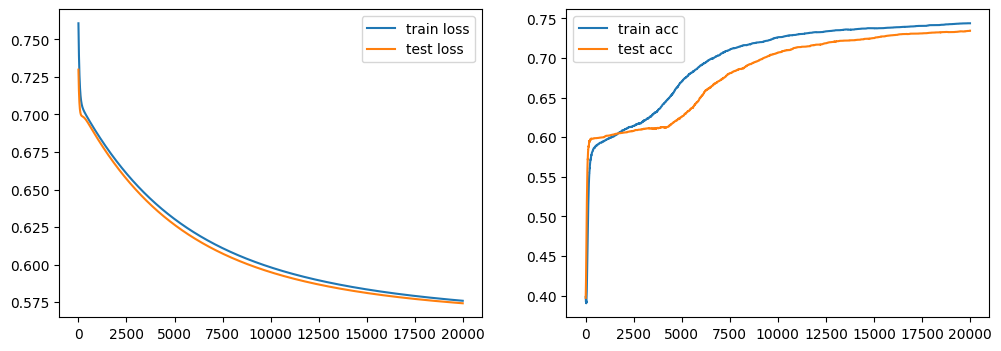

In [39]:
W, b = artificial_neuron(X_train_norm_Min_Max, y_train, X_test_norm_Min_Max, y_test, learning_rate=0.01, n_iter=20000)

In [41]:
A = model(X_test, W, b)

In [46]:
A.shape

(7646, 1)

In [47]:
y_test.shape

(7646, 1)

In [45]:
roc_auc_score(y_test, A)

0.7744880291784341

In [54]:
from os import listdir
from os.path import isfile, join

monRepertoire = 'D:\Projet\X_test_CAWNWce\X_test'
fichiers = [f for f in listdir(monRepertoire) if isfile(join(monRepertoire, f))]
del fichiers[1]
del fichiers[0]

In [55]:
fichiers
import csv
with open('Y_test.csv', mode='w', newline='') as fichier_csv:
    # Créer un objet csv.writer qui écrira dans le fichier_csv
    writer = csv.writer(fichier_csv)
    
    # Ajouter l'en-tête à la première ligne du fichier
    writer.writerow(['id'])
    
    # Écrire chaque élément de la liste dans une ligne distincte du fichier
    for element in fichiers:
        writer.writerow([element])

['23168-TEST.wav',
 '23169-TEST.wav',
 '23170-TEST.wav',
 '23171-TEST.wav',
 '23172-TEST.wav',
 '23173-TEST.wav',
 '23174-TEST.wav',
 '23175-TEST.wav',
 '23176-TEST.wav',
 '23177-TEST.wav',
 '23178-TEST.wav',
 '23179-TEST.wav',
 '23180-TEST.wav',
 '23181-TEST.wav',
 '23182-TEST.wav',
 '23183-TEST.wav',
 '23184-TEST.wav',
 '23185-TEST.wav',
 '23186-TEST.wav',
 '23187-TEST.wav',
 '23188-TEST.wav',
 '23189-TEST.wav',
 '23190-TEST.wav',
 '23191-TEST.wav',
 '23192-TEST.wav',
 '23193-TEST.wav',
 '23194-TEST.wav',
 '23195-TEST.wav',
 '23196-TEST.wav',
 '23197-TEST.wav',
 '23198-TEST.wav',
 '23199-TEST.wav',
 '23200-TEST.wav',
 '23201-TEST.wav',
 '23202-TEST.wav',
 '23203-TEST.wav',
 '23204-TEST.wav',
 '23205-TEST.wav',
 '23206-TEST.wav',
 '23207-TEST.wav',
 '23208-TEST.wav',
 '23209-TEST.wav',
 '23210-TEST.wav',
 '23211-TEST.wav',
 '23212-TEST.wav',
 '23213-TEST.wav',
 '23214-TEST.wav',
 '23215-TEST.wav',
 '23216-TEST.wav',
 '23217-TEST.wav',
 '23218-TEST.wav',
 '23219-TEST.wav',
 '23220-TEST